In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.dpi'] = 100

In [3]:
from analysisFunctions import importOrbitData


data_5_AMR = importOrbitData("sat_rigid_AMR_5_1673178970880.txt")
data_10_AMR = importOrbitData("sat_rigid_AMR_10_1673189858804.txt")
data_15_AMR = importOrbitData("sat_rigid_AMR_15_1673190132976.txt")

100%|██████████| 2628/2628 [00:00<00:00, 183145.82it/s]


In [4]:
oneDayInSeconds = 86400
oneYearInSeconds = oneDayInSeconds * 365
dayI = []
prevDayIValue = 1000000000
yearI = []
prevYearIValue = 1000000000
for i in range(len(data_5_AMR["t"])):
    
    if data_5_AMR["t"][i] % oneDayInSeconds < prevDayIValue:
        dayI.append(i)

    prevDayIValue = data_5_AMR["t"][i] % oneDayInSeconds;

    if data_5_AMR["t"][i] % oneYearInSeconds < prevYearIValue:
        yearI.append(i)

    prevYearIValue = data_5_AMR["t"][i] % oneYearInSeconds;


In [28]:
yearI

[0, 526, 1052, 1577, 2103]

(-35919014.44917835, 45960158.28827916, -44951535.286632024, 30576702.23260768)

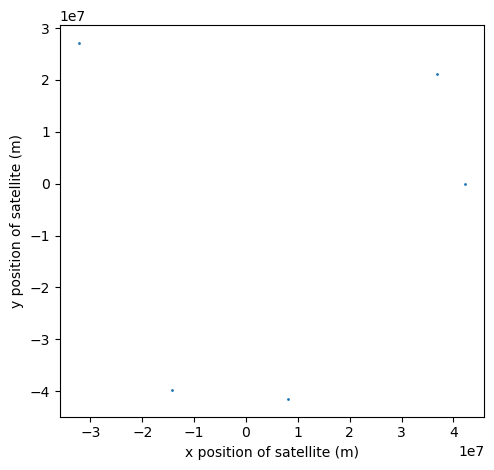

In [32]:
plt.xlabel("x position of satellite (m)")
plt.ylabel("y position of satellite (m)")
a = dayI[0]
b = dayI[3]
plt.scatter(data_15_AMR["x"][a:b],data_15_AMR["y"][a:b],s=1)
plt.tight_layout()
plt.axis('scaled')

In [6]:
#calculate kepler values
from analysisFunctions import calculateKeplerFromData

keplerData_5_AMR = calculateKeplerFromData(data_5_AMR)
keplerData_10_AMR = calculateKeplerFromData(data_10_AMR)
keplerData_15_AMR = calculateKeplerFromData(data_15_AMR)

/Users/fraser/Github/masters_project/python/orbitFunctions.py:63: RuntimeWarning: invalid value encountered in double_scalars
  Omega = np.arccos(n[0] / nMag) * rad2Deg
/Users/fraser/Github/masters_project/python/orbitFunctions.py:70: RuntimeWarning: invalid value encountered in double_scalars
  omega = np.arccos(ne / (nMag * e)) * rad2Deg


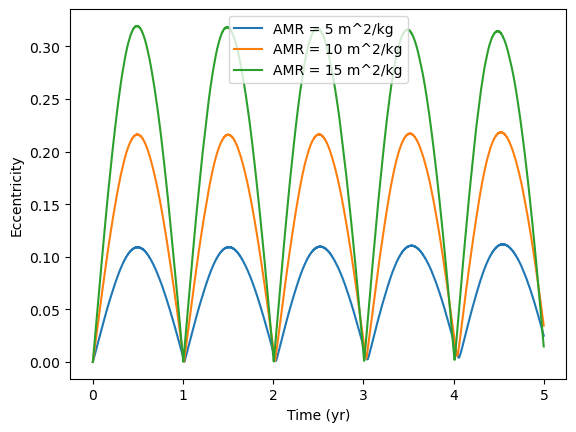

In [7]:
n = 1000
year = [ele/oneYearInSeconds for ele in data_5_AMR["t"]]
%matplotlib inline
plt.xlabel("Time (yr)")
plt.ylabel("Eccentricity")
plt.plot(year,keplerData_5_AMR["e"], label="AMR = 5 m^2/kg")
plt.plot(year,keplerData_10_AMR["e"], label="AMR = 10 m^2/kg")
plt.plot(year,keplerData_15_AMR["e"], label="AMR = 15 m^2/kg")
plt.legend()

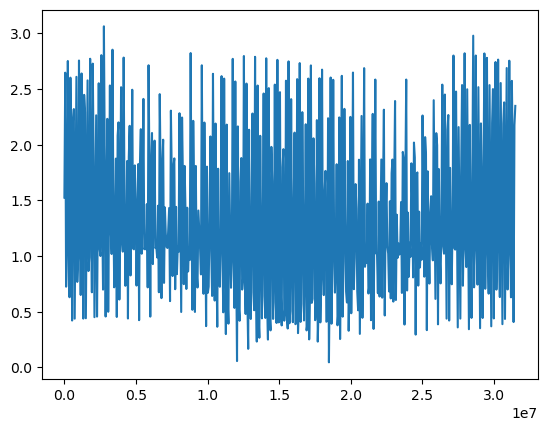

In [45]:
from orbitFunctions import calculateEccentricityVector, dot

data = data_5_AMR;
nTimestep = len(data["t"])
thetas = []

for i in range(nTimestep):

    eVector = calculateEccentricityVector(data["x"][i],data["y"][i],data["y"][i], data["vx"][i],data["vy"][i], data["vz"][i])

    #r is vector between the earth and the sun
    rX = data["sunPosX"][i]
    rY = data["sunPosY"][i]
    rZ = data["sunPosZ"][i]

    er = dot(eVector[0], eVector[1], eVector[2], rX, rY, rZ)

    magR = np.sqrt(rX*rX + rY*rY + rZ*rZ)

    magE = np.sqrt(eVector[0]*eVector[0] + eVector[1]*eVector[1] + eVector[2]*eVector[2])

    theta = np.arccos((er)/(magR*magE))

    thetas.append(theta)

averageTheta = sum(thetas)/nTimestep

rad2Deg = 180/np.pi

plt.plot(data["t"][:yearI[1]], thetas[:yearI[1]])
